# PHYS 240 - Homework 1

# By Ramon Ciutad

Here you can find the code related to the homework. It must be read in addition to the handwritten notes.

In [1]:
# Initilialize the console
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Exercise 2 part d)

See handwritten notes for explicit derivations of the distributions utilized here.

In this code, we will run a thousand realizations of the null and signal hypotheses for the given data of $\mu_i$ and $\sigma_i$

We start with the analytical method. Here we generate distributions for the test statistic $T$ for the null and signal hypotheses according to a set of derived parameters (i.e., means and variances).

We then move on to the numerical method. Here we start by generating normally distributed random samples of noise $n_i$. We then find $z_i$ (see notes for definition) in terms of $\mu_i$ and $x_i$ (note that the latter will be different for the null and signal hypotheses). We then find $T$ by summing all $z_i$. Repeating this process over all 1000 realizations we find a distribution for $T$ in the null and signal hypotheses.

Finally, we compare the analytical and numerical results for the test statistic by plotting them.

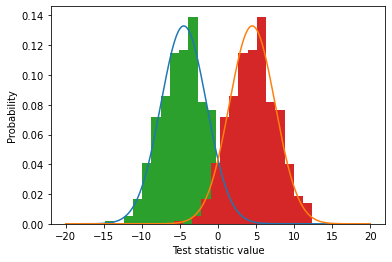

In [2]:
realizations = 1000

def mu(i):
    # This is the function that we will use to calculate all mu values
    constant = 3 / ((2*np.pi * 20**2)**(1/4))
    exponent = - (i - 256)**2 / (4 * 20**2)
    return constant * np.exp(exponent)

# Calculate mu values and append them into a list
i_list = []
mu_list = []
for i in range(512):
    i_list.append(i)
    mu_list.append(mu(i))
mu_array = np.array(mu_list)    

# Analytical method:
# Make use of the derived distributions for the test statistic (means and variances)
mean_0 = np.sum(-mu_array**2 / 2)
variance_0 = np.sum(mu_array**2)
mean_1 = np.sum(mu_array**2 / 2)
variance_1 = np.sum(mu_array**2)

# Generate 1000 datapoints according to the earlier parameterized distributions
x = np.linspace(-20, 20, 1000)
probability_0 = st.norm.pdf(x, mean_0, np.sqrt(variance_0))
probability_1 = st.norm.pdf(x, loc=mean_1, scale=np.sqrt(variance_1))


# Empirical / Numerical method:
def numerical_test_statistic():
    # Create lists for the test statistic values
    T_0_list = []
    T_1_list = []
    for iteration in range(realizations):
        # Create lists for the z values
        z_0_list = []
        z_1_list = []
        for i in range(512):
            # Calculate each z value (for each hypothesis) and append it into the corresponding list
            n = np.random.normal()
            # Null hypothesis
            x_0 = n
            z_0 = (mu_list[i]/2) * (2*x_0 - mu_list[i])
            z_0_list.append(z_0)
            # Signal hypothesis
            x_1 = n + mu_list[i]
            z_1 = (mu_list[i]/2) * (2*x_1 - mu_list[i])
            z_1_list.append(z_1)
        # Sum over z values to obatin a T value and append it into the corresponding list
        T_0 = np.sum(np.array(z_0_list))
        T_0_list.append(T_0)
        T_1 = np.sum(np.array(z_1_list))
        T_1_list.append(T_1)
    # Return lists of the test statistic values
    return T_0_list, T_1_list

T_0_list, T_1_list = numerical_test_statistic()

def plot1():
    # Plot the analytical and numerical results
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # Analytical - PDF's
    ax.plot(x, probability_0)
    ax.plot(x, probability_1)
    # Numerical - Histograms of the values of T
    ax.hist(T_0_list, bins=15, density=True)
    ax.hist(T_1_list, bins=15, density=True)
    # ax.set_ylim(0, 0.15)
    ax.set_xlabel('Test statistic value')
    ax.set_ylabel('Probability')
    plt.show()
    
plot1()

In the above figure, the distribution on the left corresponds to the null hypothesis and the one on the right corresponds to the signal hypothesis. The histograms represent the numerical results, whereas the plotted lines are the analytical distributions. 

# Exercise 2 part e)

In this part we just need to plot the ROC curve of this classifier.

To do this, we select a range of values of the threshold $\eta$ and calculate the corresponding $\alpha$ and $\beta$ making use of the survival function and cummulative distribution functions, respectively.

Finally, we plot each $\alpha$ value against its corresponding value of $1 - \beta$.

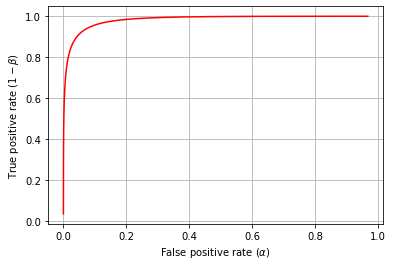

In [3]:
# Create array of values of eta and find their corresponding alpha and beta
threshold_array = np.linspace(-10, 10, 200)
alpha_array = st.norm.sf(threshold_array, mean_0, np.sqrt(variance_0))
beta_array = st.norm.cdf(threshold_array, mean_1, np.sqrt(variance_1))

def plot2(friend_test_statistic=False, alpha_numerical=0, beta_numerical=0):
    # Ignore the parameters of the function, they will be useful later
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(True)
    if friend_test_statistic: #Ignore this for now
        ax.scatter(alpha_numerical, 1 - beta_numerical)
    ax.plot(alpha_array, 1-beta_array, c='red')
    ax.set_xlabel(r'False positive rate ($\alpha$)')
    ax.set_ylabel(r'True positive rate ($1 - \beta$)')
    plt.show()
    
plot2()

# Exercise 2 part f)

In this part we make use of an alternative test statistic (that is not going to be optimal since it does not follow the Neyman-Pearson Lemma). This new test statistic makes use of a reduced range of $\mu_i$ near the peak; and it consists of the sum of the power, i.e., $\sum x_i^2$.

Having two lists of values of the new test statistic (one for each hypothesis), we then calculate $\alpha$ and $\beta$ for a range of values of $\eta$. Since these are lists of values and we cannot integrate, we find $\alpha$ and $\beta$ by calculating the percentage of values of the test statistic values that are above (or below) the threshold.

Finally, we plot all $\alpha$ and $\beta$ values to obtain a new ROC curve overlapped with the original one

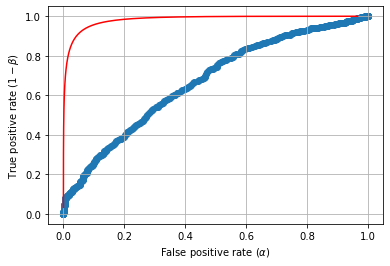

In [4]:
# Define a new mu list (with the new indices given by our friend):
mu_list = []
for i in range(256-50, 256+51):
    mu_list.append(mu(i))
mu_array = np.array(mu_list)    

def numerical_test_statistic_friend():
    # We now calculate the test statistic numerically in the same way we did before but we now sum over x^2
    T_0_list = []
    T_1_list = []    
    for iteration in range(realizations):
        x_0_list = []
        x_1_list = []
        for i in range(len(mu_list)):
            n = np.random.normal()
            # Null hypothesis
            x_0 = n
            x_0_list.append(x_0**2)
            # Signal hypothesis
            x_1 = n + mu_list[i]
            x_1_list.append(x_1**2)
        T_0 = np.sum(np.array(x_0_list))
        T_0_list.append(T_0)
        T_1 = np.sum(np.array(x_1_list))
        T_1_list.append(T_1)
    return T_0_list, T_1_list

T_0_list, T_1_list = numerical_test_statistic_friend()

# Now compute alpha and beta numerically (as explained above)
threshold_array = np.linspace(-50, 175, 1000)
alpha_array_friend = np.array([])
beta_array_friend = np.array([])
for eta in threshold_array:
    alpha = len(np.where(np.array(T_0_list) > eta)[0]) / realizations
    beta = len(np.where(np.array(T_1_list) < eta)[0]) / realizations
    alpha_array_friend = np.append(alpha_array_friend, alpha)
    beta_array_friend = np.append(beta_array_friend, beta)

# Plot both results
plot2(friend_test_statistic=True, alpha_numerical=alpha_array_friend, beta_numerical=beta_array_friend)

As one can see in the above figure, despite our friend's idea seemed interesting, the results it yields are quite poor. As predicted by the Neyman-Pearson Lemma, our friend's test statistic is not as effective as the one proposed by the lemma.

To fully compare the results of both test statistics, we select a value of $\alpha$ of $1\%$ and compare the corresponding values of $1 - \beta$.

Since we do not have analytical distributions that allow us to relate $\alpha$ and $\beta$, we choose the value of alpha that is closest to $0.01$ and select the corresponding value of $1 - \beta$.

In [5]:
# Find closest alpha value for both cases to 1% and compare the respective beta values
def find_index_in_list(array):
    difference = abs(array - 0.01)
    return np.argwhere(difference == min(difference))[0][0]

index_NP_lemma = find_index_in_list(alpha_array)
index_friend = find_index_in_list(alpha_array_friend)

print("Our test gives a true positive rate of {0:3.2f}, whereas my friend's test yields a true positive rate of {1:3.2f}".format(
    (1 - beta_array[index_NP_lemma]), (1 - beta_array_friend[index_friend])))

Our test gives a true positive rate of 0.75, whereas my friend's test yields a true positive rate of 0.08
